In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: to display all columns
pd.set_option('display.max_columns', None)

In [3]:
#Load the data
data = pd.read_csv("..\\data\\churn_prediction_data.csv")

## Basic Information

In [4]:
print("Dataset shape:", data.shape)
print("\nColumn names:")
print(data.columns.tolist())
print("\nFirst few rows:")
data.head()

Dataset shape: (7043, 21)

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Types and Missing Values

In [5]:
# Data types and missing values
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploring Missing Values in TotalCharges

In [6]:
"""First look to see if there are empty strings or spaces that need to be dealt with before converting"""
print("Unique TotalCharges values (first 20):")
print(data["TotalCharges"].unique()[:20])

#check for any non-numeric values
print("\nAny non-numeric values?")
non_numeric = data[pd.to_numeric(data["TotalCharges"], errors="coerce").isna()]
print(f"Found {len(non_numeric)} non-numeric values")
if len(non_numeric) > 0:
    print(non_numeric["TotalCharges"].unique)

Unique TotalCharges values (first 20):
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95' '587.45' '326.8' '5681.1' '5036.3' '2686.05'
 '7895.15' '1022.95' '7382.25' '528.35' '1862.9']

Any non-numeric values?
Found 11 non-numeric values
<bound method Series.unique of 488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object>


In [7]:
#Get the TotalCharges values for those problematic rows
problematic_indices = pd.to_numeric(data["TotalCharges"], errors="coerce").isna()
print("Non-numeric TotalCharges values:")
print(data.loc[problematic_indices, "TotalCharges"].unique())

#Full rows to find patterns
print("\nFull rows with non-numeric TotalCharges:")
print(data.loc[problematic_indices, ["customerID", "tenure", "MonthlyCharges", "TotalCharges"]])

Non-numeric TotalCharges values:
[' ']

Full rows with non-numeric TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             
6754  2775-SEFEE       0           61.90             


In [8]:
 # Find all rows with tenure = 0
zero_tenure = data[data['tenure'] == 0]
print(f"Total rows with tenure = 0: {len(zero_tenure)}")

# Look at their TotalCharges values
print("\nTotalCharges values for tenure = 0 customers:")
print(zero_tenure['TotalCharges'].unique())

# See a few examples
print("\nSample of tenure = 0 customers:")
print(zero_tenure[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

# Test the reverse - do all empty TotalCharges have tenure = 0?
empty_total_charges = data.loc[problematic_indices]
print(f"\nTenure values for rows with non-numeric TotalCharges:")
print(empty_total_charges['tenure'].unique())

Total rows with tenure = 0: 11

TotalCharges values for tenure = 0 customers:
[' ']

Sample of tenure = 0 customers:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             

Tenure values for rows with non-numeric TotalCharges:
[0]


In [9]:
 # Handle missing TotalCharges values
# Analysis showed 11 customers with tenure=0 have empty string TotalCharges
# Business logic: New customers (0 months) haven't accumulated charges yet

# Decision: Set TotalCharges = 0 for these customers
# Rationale: Most conservative approach, assumes TotalCharges represents
# cumulative billing over complete months only
# Alternative considered: Set to MonthlyCharges (assumes partial month billing)
# In production: Would validate billing logic with business stakeholders

print("Before cleaning:")
print(f"Non-numeric TotalCharges: {pd.to_numeric(data['TotalCharges'], errors='coerce').isna().sum()}")

# Apply the fix
data.loc[data['tenure'] == 0, 'TotalCharges'] = '0'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

print("After cleaning:")
print(f"TotalCharges data type: {data['TotalCharges'].dtype}")
print(f"Missing values: {data['TotalCharges'].isna().sum()}")
print(f"TotalCharges for tenure=0 customers: {data.loc[data['tenure']==0, 'TotalCharges'].unique()}")

Before cleaning:
Non-numeric TotalCharges: 11
After cleaning:
TotalCharges data type: float64
Missing values: 0
TotalCharges for tenure=0 customers: [0.]


In [10]:
#Does TotalCharges generally align with tenure * MonthlyCharges?
#Yes
data['Expected_Total'] = data['tenure'] * data['MonthlyCharges']
print("Sample of TotalCharges vs Expected (tenure*monthly):")
print(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Expected_Total']].head(10))

Sample of TotalCharges vs Expected (tenure*monthly):
   tenure  MonthlyCharges  TotalCharges  Expected_Total
0       1           29.85         29.85           29.85
1      34           56.95       1889.50         1936.30
2       2           53.85        108.15          107.70
3      45           42.30       1840.75         1903.50
4       2           70.70        151.65          141.40
5       8           99.65        820.50          797.20
6      22           89.10       1949.40         1960.20
7      10           29.75        301.90          297.50
8      28          104.80       3046.05         2934.40
9      62           56.15       3487.95         3481.30


## Checking Data Quality of Other Columns

In [11]:
#look at unique values for each column
for col in data.columns:
    unique_vals = data[col].unique()
    print(f"\n{col} ({data[col].dtype}):")
    print(f" Unique count: {len(unique_vals)}")
    if len(unique_vals) <= 10:
        print(f" Values: {unique_vals}")
    else:
        print(f" First 10: {unique_vals[:10]}")
        print(f" Last 10: {unique_vals}")


customerID (object):
 Unique count: 7043
 First 10: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
 Last 10: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender (object):
 Unique count: 2
 Values: ['Female' 'Male']

SeniorCitizen (int64):
 Unique count: 2
 Values: [0 1]

Partner (object):
 Unique count: 2
 Values: ['Yes' 'No']

Dependents (object):
 Unique count: 2
 Values: ['No' 'Yes']

tenure (int64):
 Unique count: 73
 First 10: [ 1 34  2 45  8 22 10 28 62 13]
 Last 10: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService (object):
 Unique count: 2
 Values: ['No' 'Yes']

MultipleLines (object):
 Unique count: 3
 Values: ['No phone service' 'No' 'Yes']

InternetService (object

In [12]:
 # Check that the InternetService column values match with column that have 'No internet service' as a value
internet_related_cols = []
for col in data.columns:
    if 'No internet service' in data[col].unique():
        internet_related_cols.append(col)

print("Columns with 'No internet service' values:")
print(internet_related_cols)

# Check the logic for each internet-related column
for col in internet_related_cols:
    print(f"\n--- Checking {col} ---")
   
    # When InternetService == 'No', what values does this column have?
    no_internet_values = data[data['InternetService'] == 'No'][col].unique()
    print(f"When InternetService='No', {col} values: {no_internet_values}")
   
    # When InternetService != 'No', what values does this column have?
    has_internet_values = data[data['InternetService'] != 'No'][col].unique()
    print(f"When InternetService!='No', {col} values: {has_internet_values}")

Columns with 'No internet service' values:
['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

--- Checking OnlineSecurity ---
When InternetService='No', OnlineSecurity values: ['No internet service']
When InternetService!='No', OnlineSecurity values: ['No' 'Yes']

--- Checking OnlineBackup ---
When InternetService='No', OnlineBackup values: ['No internet service']
When InternetService!='No', OnlineBackup values: ['Yes' 'No']

--- Checking DeviceProtection ---
When InternetService='No', DeviceProtection values: ['No internet service']
When InternetService!='No', DeviceProtection values: ['No' 'Yes']

--- Checking TechSupport ---
When InternetService='No', TechSupport values: ['No internet service']
When InternetService!='No', TechSupport values: ['No' 'Yes']

--- Checking StreamingTV ---
When InternetService='No', StreamingTV values: ['No internet service']
When InternetService!='No', StreamingTV values: ['No' 'Yes']

--- Checking St

In [13]:
#Check for common fake missing values
fake_missing = ['', ' ', 'N/A', 'NA', 'null', 'NULL', 'None', '?', '-']

print("Checking for fake missing values:")
found_any = False
for col in data.columns:
    for fake_val in fake_missing:
        count = (data[col] == fake_val).sum()
        if count > 0:
            print(f"Column '{col}' has {count} '{fake_val}' values")
            found_any = True

if not found_any:
    print("No fake missing values found")

Checking for fake missing values:
No fake missing values found


In [14]:
 # For object columns, check string lengths
print("Checking for suspiciously short string values:")
found_short = False

for col in data.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip ID column
        min_len = data[col].str.len().min()
        max_len = data[col].str.len().max()
        print(f"{col}: length range {min_len}-{max_len}")
       
        if min_len <= 1:
            print(f"  ⚠️  {col} has very short values:")
            short_vals = data[data[col].str.len() <= 1][col].unique()
            print(f"  Short values: {short_vals}")
            found_short = True

if not found_short:
    print("No suspiciously short string values found!")

Checking for suspiciously short string values:
gender: length range 4-6
Partner: length range 2-3
Dependents: length range 2-3
PhoneService: length range 2-3
MultipleLines: length range 2-16
InternetService: length range 2-11
OnlineSecurity: length range 2-19
OnlineBackup: length range 2-19
DeviceProtection: length range 2-19
TechSupport: length range 2-19
StreamingTV: length range 2-19
StreamingMovies: length range 2-19
Contract: length range 8-14
PaperlessBilling: length range 2-3
PaymentMethod: length range 12-25
Churn: length range 2-3
No suspiciously short string values found!


In [15]:
#Basic statistics for numeric columns
print("\nNumeric column statistics:")
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Numeric column statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


## Univariate Analysis

In [16]:
 # Churn rate analysis for all categorical variables
categorical_cols = ['Contract', 'PaymentMethod', 'InternetService', 'gender',
                   'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in categorical_cols:
    print(f"Churn rate by {col}:")
    churn_rates = data.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    print(churn_rates)
    print("-" * 50)

Churn rate by Contract:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319
--------------------------------------------------
Churn rate by PaymentMethod:
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067
--------------------------------------------------
Churn rate by InternetService:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050
--------------------------------------------------
Churn rate by gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
--

In [17]:
#Calculate churn rate differences for all categorical variables
churn_differences = {}

for col in categorical_cols:
    churn_rates = data.groupby(col)['Churn'].apply(lambda x: (x== 'Yes').mean())
    max_churn = churn_rates.max()
    min_churn = churn_rates.min()
    difference = max_churn - min_churn
    churn_differences[col] = difference

#sort by biggest differences
sorted_differences = sorted(churn_differences.items(), key=lambda x: x[1], reverse=True)

print("Churn rate differences (max - min) by variable:")
for var, diff in sorted_differences:
    print(f"{var}: {diff:.3f}")

Churn rate differences (max - min) by variable:
Contract: 0.399
InternetService: 0.345
OnlineSecurity: 0.344
TechSupport: 0.342
OnlineBackup: 0.325
DeviceProtection: 0.317
PaymentMethod: 0.300
StreamingMovies: 0.263
StreamingTV: 0.261
SeniorCitizen: 0.181
PaperlessBilling: 0.172
Dependents: 0.158
Partner: 0.133
MultipleLines: 0.037
PhoneService: 0.018
gender: 0.008


In [18]:
#Check the relationship between InternetService and the add-on services
addon_services = ['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']

print("Dependency check: InternetService vs Add-on Services")
print("=" * 60)

for service in addon_services:
    print(f"\n{service} breakdown by InternetService:")
    crosstab = pd.crosstab(data['InternetService'], data[service], margins=True)
    print(crosstab)

Dependency check: InternetService vs Add-on Services

OnlineSecurity breakdown by InternetService:
OnlineSecurity     No  No internet service   Yes   All
InternetService                                       
DSL              1241                    0  1180  2421
Fiber optic      2257                    0   839  3096
No                  0                 1526     0  1526
All              3498                 1526  2019  7043

TechSupport breakdown by InternetService:
TechSupport        No  No internet service   Yes   All
InternetService                                       
DSL              1243                    0  1178  2421
Fiber optic      2230                    0   866  3096
No                  0                 1526     0  1526
All              3473                 1526  2044  7043

OnlineBackup breakdown by InternetService:
OnlineBackup       No  No internet service   Yes   All
InternetService                                       
DSL              1335                    0  

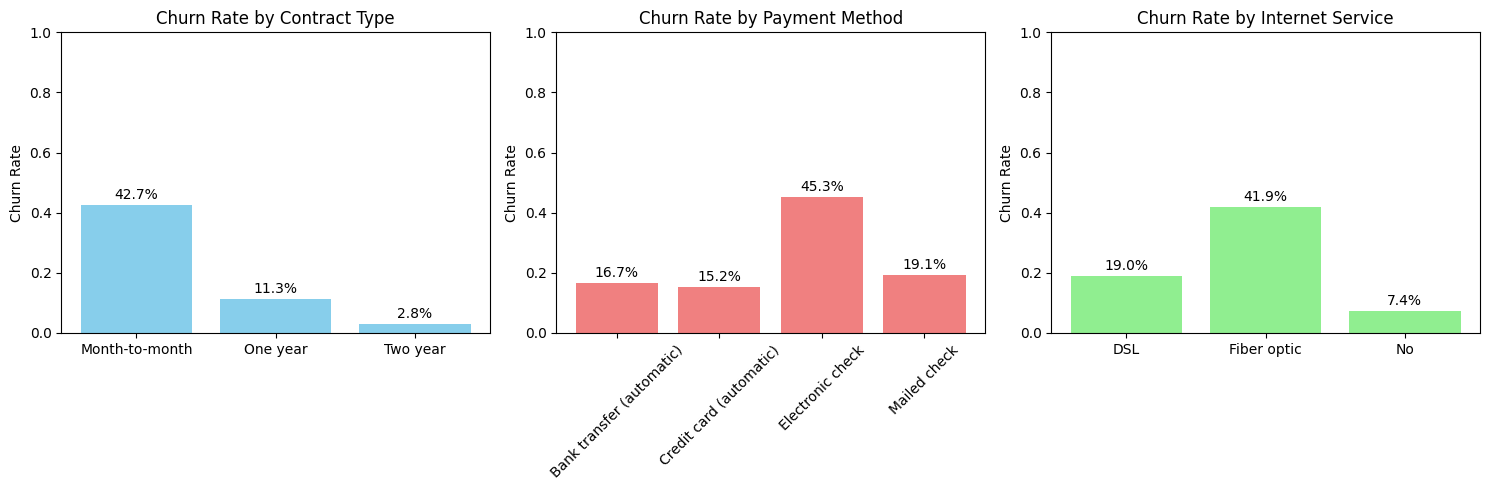


Exact churn rates:
Contract:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

PaymentMethod:
PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64

InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64


'\nContract is a major indicator for churn.  Month-to-month has very significant churn at 42.7%.  2 year contracts have excellent retention at 2.8% churn\nPayment method shows that paying by electronic check has a very high churn rate of 45.3%.  Automatic payments have much better retention (~15% churn)\nFiber optic customers have surprisingly high churn of 41.9%.\n\nQuestions:\nHow can we move month-to-month customers to longer contracts?\nWhy is electronic check so problematic?\nWhy are fiber optic customers churning so much?\n'

In [19]:
#Deep dive visualizations for Contract, PaymentMethod and InternetService
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Contract analysis
contract_churn = data.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean())
axes[0].bar(contract_churn.index, contract_churn.values, color='skyblue')
axes[0].set_title('Churn Rate by Contract Type')
axes[0].set_ylabel('Churn Rate')
axes[0].set_ylim(0, 1)
for i, v in enumerate(contract_churn.values):
    axes[0].text(i, v + 0.02, f'{v:.1%}', ha='center')

#Payment Method analysis
payment_churn = data.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean())
axes[1].bar(payment_churn.index, payment_churn.values, color='lightcoral')
axes[1].set_title('Churn Rate by Payment Method')
axes[1].set_ylabel('Churn Rate')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(payment_churn.values):
    axes[1].text(i, v + 0.02, f'{v:.1%}', ha='center')

#Internet Service analysis
internet_churn = data.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean())
axes[2].bar(internet_churn.index, internet_churn.values, color='lightgreen')
axes[2].set_title('Churn Rate by Internet Service')
axes[2].set_ylabel('Churn Rate')
axes[2].set_ylim(0, 1)
for i, v in enumerate(internet_churn.values):
    axes[2].text(i, v + 0.02, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

#Print exact numbers for reference
print("\nExact churn rates:")
print(f"Contract:\n{contract_churn}")
print(f"\nPaymentMethod:\n{payment_churn}")
print(f"\nInternetService:\n{internet_churn}")

"""
Contract is a major indicator for churn.  Month-to-month has very significant churn at 42.7%.  2 year contracts have excellent retention at 2.8% churn
Payment method shows that paying by electronic check has a very high churn rate of 45.3%.  Automatic payments have much better retention (~15% churn)
Fiber optic customers have surprisingly high churn of 41.9%.

Questions:
How can we move month-to-month customers to longer contracts?
Why is electronic check so problematic?
Why are fiber optic customers churning so much?
"""

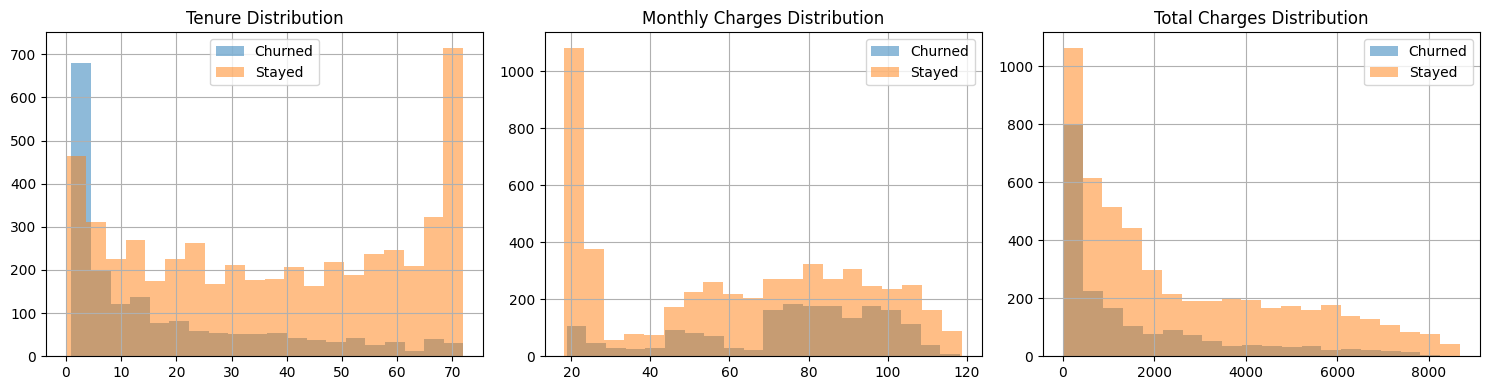

'\nThere is a churn spike in month one, connects to month-to-month contract churn.\nTotal charges data reinforces this\nCustomer onboarding/first experience is critical.\n\nMonthly charges has a churn sweet spot at $70-$110\nCheck to see if fiber optic internet is connected to this price range\n'

In [20]:
# Quick look at numeric variables vs churn
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Tenure distribution by churn
data[data['Churn']=='Yes']['tenure'].hist(alpha=0.5, label='Churned', bins=20, ax=axes[0])
data[data['Churn']=='No']['tenure'].hist(alpha=0.5, label='Stayed', bins=20, ax=axes[0])
axes[0].set_title('Tenure Distribution')
axes[0].legend()

# MonthlyCharges distribution by churn
data[data['Churn']=='Yes']['MonthlyCharges'].hist(alpha=0.5, label='Churned', bins=20, ax=axes[1])
data[data['Churn']=='No']['MonthlyCharges'].hist(alpha=0.5, label='Stayed', bins=20, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')
axes[1].legend()

# TotalCharges distribution by churn
data[data['Churn']=='Yes']['TotalCharges'].hist(alpha=0.5, label='Churned', bins=20, ax=axes[2])
data[data['Churn']=='No']['TotalCharges'].hist(alpha=0.5, label='Stayed', bins=20, ax=axes[2])
axes[2].set_title('Total Charges Distribution')
axes[2].legend()

plt.tight_layout()
plt.show()

"""
There is a churn spike in month one, connects to month-to-month contract churn.
Total charges data reinforces this
Customer onboarding/first experience is critical.

Monthly charges has a churn sweet spot at $70-$110
Check to see if fiber optic internet is connected to this price range
"""

In [21]:
#Does the $70-$110 churn pattern connect to fiber optic?
print("Monthly charges by Internet Service:")
print(data.groupby('InternetService')['MonthlyCharges'].describe())

fiber_customers = data[data['InternetService'] == 'Fiber optic']
mid_range_fiber = fiber_customers[(fiber_customers['MonthlyCharges'] >= 70) &
                                  (fiber_customers['MonthlyCharges'] <= 110)]
print(f"\nFiber customers in $70-$110 range: {len(mid_range_fiber)} of {len(fiber_customers)})")

"""
89.7% of the fiber optic customers are in this $70-$110 range (fiber optic churn rate is 41.9%).
The churning customers at $70-$110 and the fiber optic churning customers are the same customers.
Fiber optic customers are paying $70-$110 and churning at high rates.
Suggests value perception issues, customers don't think fiber is worth the premium.
"""

Monthly charges by Internet Service:
                  count       mean        std    min    25%     50%     75%  \
InternetService                                                               
DSL              2421.0  58.102169  16.259522  23.45  46.20  56.150   69.90   
Fiber optic      3096.0  91.500129  12.663039  67.75  80.55  91.675  101.15   
No               1526.0  21.079194   2.164221  18.25  19.70  20.150   20.90   

                    max  
InternetService          
DSL               94.80  
Fiber optic      118.75  
No                26.90  

Fiber customers in $70-$110 range: 2776 of 3096)


"\n89.7% of the fiber optic customers are in this $70-$110 range (fiber optic churn rate is 41.9%).\nThe churning customers at $70-$110 and the fiber optic churning customers are the same customers.\nFiber optic customers are paying $70-$110 and churning at high rates.\nSuggests value perception issues, customers don't think fiber is worth the premium.\n"

In [22]:
 # Deep dive into fiber optic customers
print("=== FIBER OPTIC DEEP DIVE ===")

# 1. How do fiber customers compare on other key churn drivers?
print("\n1. Fiber customers vs Contract types:")
fiber_contracts = data[data['InternetService'] == 'Fiber optic']['Contract'].value_counts(normalize=True)
print(fiber_contracts)

print("\n2. Fiber customers vs Payment methods:")
fiber_payment = data[data['InternetService'] == 'Fiber optic']['PaymentMethod'].value_counts(normalize=True)
print(fiber_payment)

print("\n3. Fiber customer tenure distribution:")
print(data[data['InternetService'] == 'Fiber optic']['tenure'].describe())

# 4. Do fiber customers use more add-on services?
addon_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
print("\n4. Fiber customers' add-on service usage:")
for service in addon_services:
    fiber_addon = data[data['InternetService'] == 'Fiber optic'][service].value_counts(normalize=True)
    print(f"{service}: {fiber_addon['Yes']:.1%} use it" if 'Yes' in fiber_addon.index else f"{service}: 0% use it")

=== FIBER OPTIC DEEP DIVE ===

1. Fiber customers vs Contract types:
Contract
Month-to-month    0.687339
One year          0.174096
Two year          0.138566
Name: proportion, dtype: float64

2. Fiber customers vs Payment methods:
PaymentMethod
Electronic check             0.515181
Bank transfer (automatic)    0.208656
Credit card (automatic)      0.192829
Mailed check                 0.083333
Name: proportion, dtype: float64

3. Fiber customer tenure distribution:
count    3096.000000
mean       32.917959
std        24.425332
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

4. Fiber customers' add-on service usage:
OnlineSecurity: 27.1% use it
OnlineBackup: 43.4% use it
DeviceProtection: 43.8% use it
TechSupport: 28.0% use it


In [23]:
 """
MAJOR BUSINESS INSIGHT: Fiber Optic Customer "Perfect Storm" Analysis

Key Finding: Fiber optic customers represent a "perfect storm" of high-risk characteristics
that explain multiple churn patterns observed in the data.

Fiber Optic Customer Profile:
- 69% have month-to-month contracts (vs 42.7% baseline churn for month-to-month)
- 52% pay by electronic check (vs 45.3% baseline churn for electronic check)
- 89.7% pay $70-110/month (premium pricing tier)
- 28-44% use various add-on services (higher service expectations)
- Result: 41.9% churn rate for fiber customers

Root Cause Analysis:
1. CUSTOMER ACQUISITION ISSUE: Fiber service attracts price-sensitive,
   commitment-averse customers who want premium service without premium commitment
   
2. COMPOUND RISK FACTORS: Fiber customers stack multiple high-risk behaviors:
   - Low commitment (month-to-month contracts)  
   - Problematic payment method (electronic check)
   - High expectations (premium pricing + add-ons)
   
3. EXPLAINS OTHER PATTERNS:
   - Electronic check high churn → driven by fiber customer overlap
   - $70-110 monthly charge churn → driven by fiber pricing
   - Premium service churn → expectation vs value mismatch

Business Recommendations:
- Restructure fiber customer acquisition to target contract-willing customers
- Offer contract incentives specifically for fiber service
- Push automatic payment adoption for fiber customers
- Review fiber pricing/value proposition

This analysis demonstrates how multiple variables interact to create
compound business problems, not just individual risk factors.
"""

'\nMAJOR BUSINESS INSIGHT: Fiber Optic Customer "Perfect Storm" Analysis\n\nKey Finding: Fiber optic customers represent a "perfect storm" of high-risk characteristics\nthat explain multiple churn patterns observed in the data.\n\nFiber Optic Customer Profile:\n- 69% have month-to-month contracts (vs 42.7% baseline churn for month-to-month)\n- 52% pay by electronic check (vs 45.3% baseline churn for electronic check)\n- 89.7% pay $70-110/month (premium pricing tier)\n- 28-44% use various add-on services (higher service expectations)\n- Result: 41.9% churn rate for fiber customers\n\nRoot Cause Analysis:\n1. CUSTOMER ACQUISITION ISSUE: Fiber service attracts price-sensitive,\n  commitment-averse customers who want premium service without premium commitment\n  \n2. COMPOUND RISK FACTORS: Fiber customers stack multiple high-risk behaviors:\n  - Low commitment (month-to-month contracts)  \n  - Problematic payment method (electronic check)\n  - High expectations (premium pricing + add-ons)\

Churn rate by Risk Score:
RiskScore
0    0.008152
1    0.017084
2    0.055195
3    0.125000
4    0.192429
5    0.357827
6    0.435556
7    0.603673
Name: Churn, dtype: float64

Risk Score distribution:
RiskScore
0     368
1     878
2     924
3     688
4     951
5    1252
6     675
7    1307
Name: count, dtype: int64

Highest risk customers (score 6-7):
Count: 1982
Churn rate: 54.6%


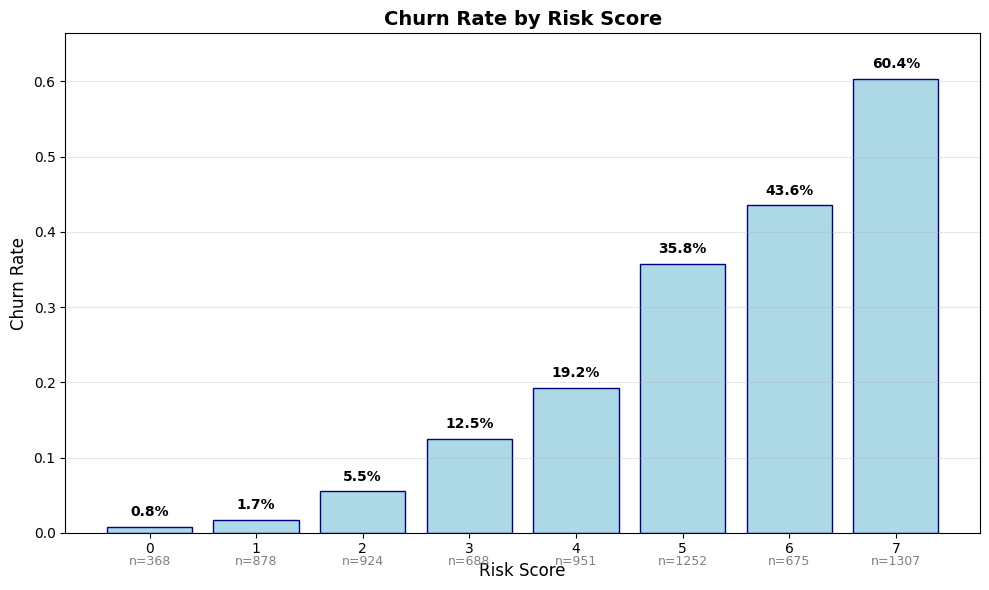

Risk Score Analysis:
Score 0: 0.8% churn rate (368 customers)
Score 1: 1.7% churn rate (878 customers)
Score 2: 5.5% churn rate (924 customers)
Score 3: 12.5% churn rate (688 customers)
Score 4: 19.2% churn rate (951 customers)
Score 5: 35.8% churn rate (1252 customers)
Score 6: 43.6% churn rate (675 customers)
Score 7: 60.4% churn rate (1307 customers)


In [24]:
 # Create risk score based on your findings
def calculate_risk_score(row):
    score = 0
   
    # Contract risk (biggest factor)
    if row['Contract'] == 'Month-to-month':
        score += 3
    elif row['Contract'] == 'One year':
        score += 1
    # Two year gets 0
   
    # Payment method risk  
    if row['PaymentMethod'] == 'Electronic check':
        score += 2
    elif row['PaymentMethod'] == 'Mailed check':
        score += 1
    # Automatic methods get 0
   
    # Service type risk
    if row['InternetService'] == 'Fiber optic':
        score += 2
    elif row['InternetService'] == 'DSL':
        score += 1
    # No internet gets 0
   
    return score

data['RiskScore'] = data.apply(calculate_risk_score, axis=1)

# Analyze churn by risk score
print("Churn rate by Risk Score:")
risk_churn = data.groupby('RiskScore')['Churn'].apply(lambda x: (x == 'Yes').mean())
print(risk_churn)

 # How many customers fall into each risk category?
print("\nRisk Score distribution:")
print(data['RiskScore'].value_counts().sort_index())

# What's the profile of highest risk customers?
print("\nHighest risk customers (score 6-7):")
high_risk = data[data['RiskScore'] >= 6]
print(f"Count: {len(high_risk)}")
print(f"Churn rate: {(high_risk['Churn'] == 'Yes').mean():.1%}")

 # Create bar chart of risk scores vs churn rates
plt.figure(figsize=(10, 6))

# Calculate churn rates by risk score
risk_churn = data.groupby('RiskScore')['Churn'].apply(lambda x: (x == 'Yes').mean())

# Create the bar chart
bars = plt.bar(risk_churn.index, risk_churn.values, color='lightblue', edgecolor='navy')

# Add percentage labels on top of bars
for i, (score, rate) in enumerate(risk_churn.items()):
    plt.text(score, rate + 0.01, f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.title('Churn Rate by Risk Score', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, max(risk_churn.values) * 1.1)  # Give some space above highest bar
plt.grid(axis='y', alpha=0.3)

# Add risk score count as secondary info
for score in risk_churn.index:
    count = data[data['RiskScore'] == score].shape[0]
    plt.text(score, -0.03, f'n={count}', ha='center', va='top', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# Print the data for reference
print("Risk Score Analysis:")
for score in sorted(risk_churn.index):
    count = data[data['RiskScore'] == score].shape[0]
    rate = risk_churn[score]
    print(f"Score {score}: {rate:.1%} churn rate ({count} customers)")

In [ ]:
#Functions for recommendations dashboard
def calculate_business_impact():
    """Calculate potential business impact of recommendations"""
    current_customers = len(data)
    current_churn_rate = (data['Churn'] == 'Yes').mean()
    current_annual_churn = current_customers * current_churn_rate

    #Estimate revenue impact (assuming average customer value)
    avg_monthly_revenue = data['MonthlyCharges'].mean()
    avg_customer_lifetime = data['tenure'].mean()
    avg_customer_value = avg_monthly_revenue * avg_customer_lifetime

    impact_scenarios = {
        'fiber_fix': {
            'customers_saved': int(len(data[data['InternetService'] == 'Fiber optic']) * 0.17), #17% improvement
            'revenue_impact': int(len(data[data['InternetService'] == 'Fiber optic']) * 0.17 * avg_customer_value)
        },
        'payment_migration': {
            'customers_saved': int(len(data[data['PaymentMethod'] == 'Electronic check']) * 0.25), #25% improvement
            'revenue_impact': int(len(data[data['PaymentMethod'] == 'Electronic check']) * 0.25 * avg_customer_value)
        },
        'overall_impact': {
            'churn_reduction': 0.05, #5% overall churn reduction
            'customers_saved': int(current_customers * 0.05),
            'revenue_impact': int(current_customers * 0.05 * avg_customer_value)
        }
    }

    return impact_scenarios

calculate_business_impact()

{'fiber_fix': {'customers_saved': 526, 'revenue_impact': 1103382},
 'payment_migration': {'customers_saved': 591, 'revenue_impact': 1239502},
 'overall_impact': {'churn_reduction': 0.05,
  'customers_saved': 352,
  'revenue_impact': 738250}}